<a href="https://colab.research.google.com/github/kcarnold/cs344/blob/main/src/A_Batch_of_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq fastbook

# Preamble

In [2]:
from fastai.vision.all import *

In [3]:
# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.PETS) / "images"
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:
image_files = get_image_files(path)
image_files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_112.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_66.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_102.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_259.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_69.jpg')...]

Make a stable order for the images: first sort, then randomize using a known seed.

In [6]:
image_files.sort()
set_seed(42)
random.shuffle(image_files)

# Splitting

In [7]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

## Datasets, DataBlocks, and DataLoaders

In [8]:
def cat_or_dog(x): return 'cat' if x[0].isupper() else 'dog'

In [9]:
filename = path / "Sphynx_250.jpg"
filename

Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg')

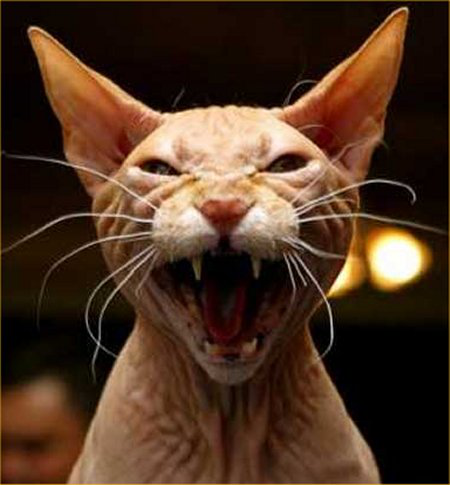

In [10]:
img = PILImage.create(filename); img

In [11]:
def get_y(file_path):
    return cat_or_dog(file_path.name)
get_y(filename)

'cat'

In [12]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [13]:
# override shuffle_fn so that the images never actually get shuffled (batch order is consistent)
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [14]:
dataloaders.train.n

5912

# What does a batch of images look like?

In [15]:
batch = dataloaders.train.one_batch()
images, labels = batch

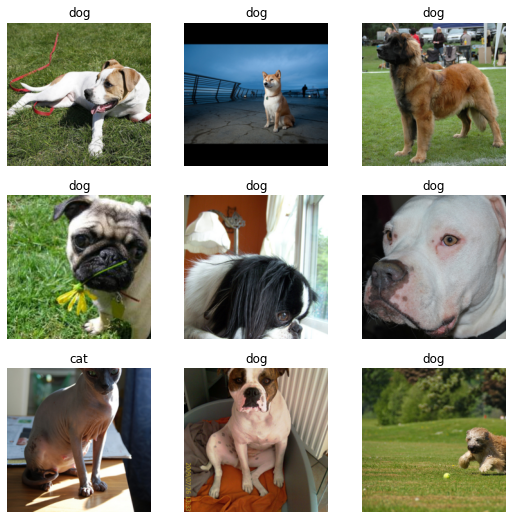

In [16]:
show_image_batch((images, dataloaders.train.vocab.map_ids(labels)))

In [17]:
images.shape

(9, 3, 224, 224)

In [18]:
labels

TensorCategory([1, 1, 1, 1, 1, 1, 0, 1, 1])

In [19]:
vocab = dataloaders.train.vocab
vocab[0], vocab[1]

('cat', 'dog')

In [20]:
#dataloaders.train.decode_batch((images, labels))

In [21]:
dataloaders.train.vocab[0]

'cat'

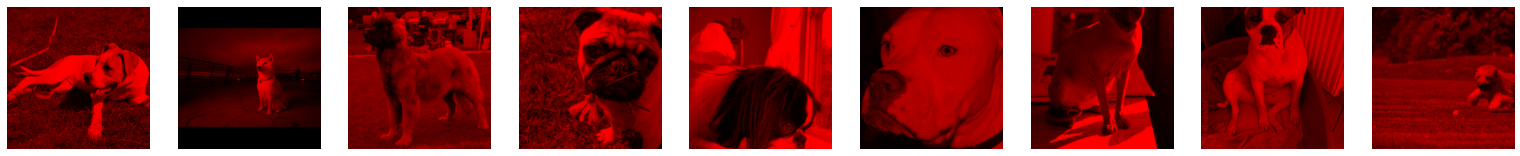

In [22]:
show_images(images * (torch.Tensor([1, 0, 0])[None, :, None, None]))

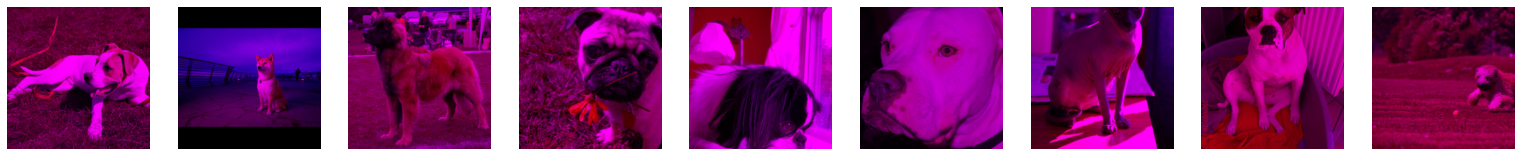

In [23]:
tmp_images = images.clone()
tmp_images[:, 1] = 0
show_images(tmp_images)

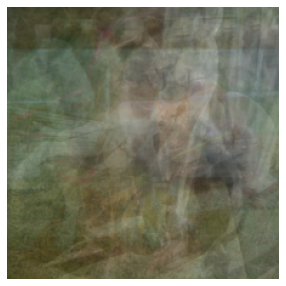

In [24]:
show_image(images.mean(dim=0))

In [25]:
images.mean(dim=1, keepdim=True).shape

(9, 1, 224, 224)

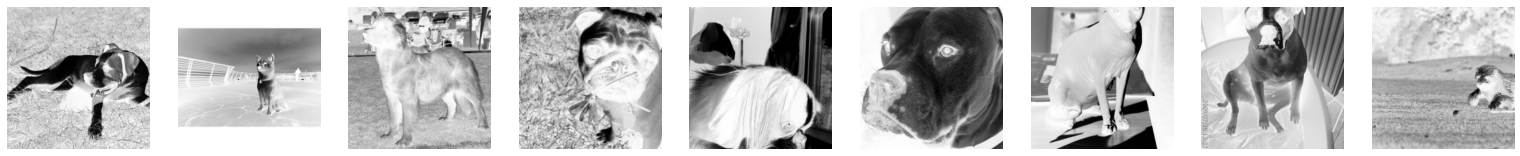

In [26]:
show_images(images.mean(dim=1))

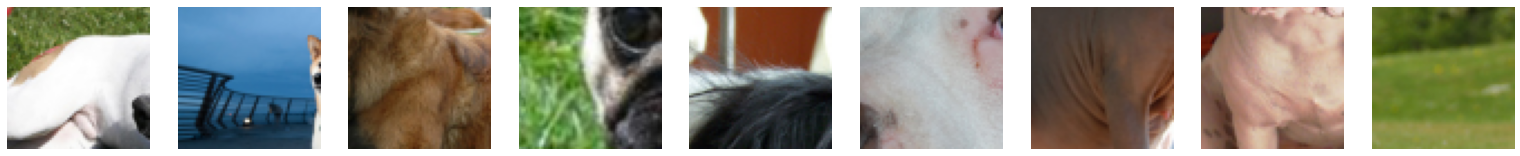

In [27]:
show_images(images[:,:,64:128, 64:128])

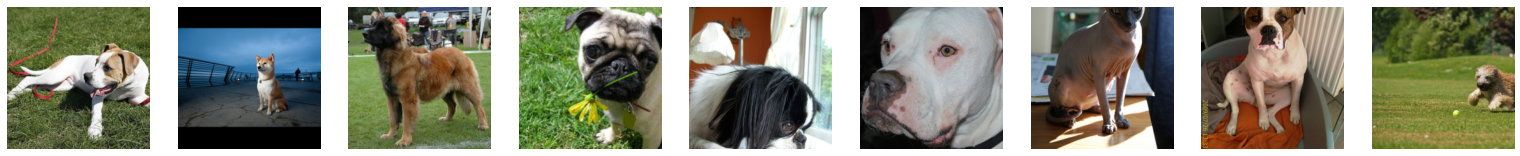

In [28]:
show_images(RandomResizedCrop(64)(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


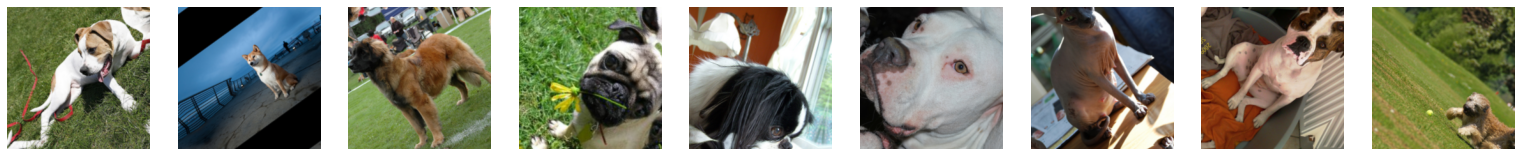

In [29]:
show_images(Rotate(max_deg=50, p=1.0)(images))

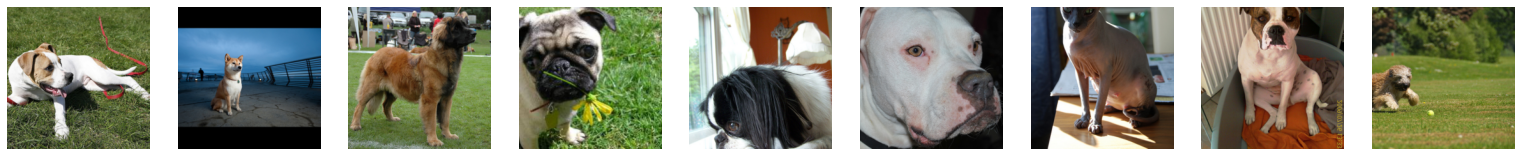

In [30]:
show_images(Flip(p=1.0)(images))

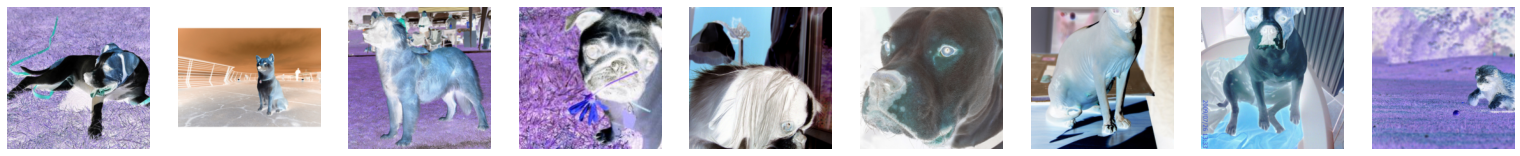

In [31]:
show_images(1-images)

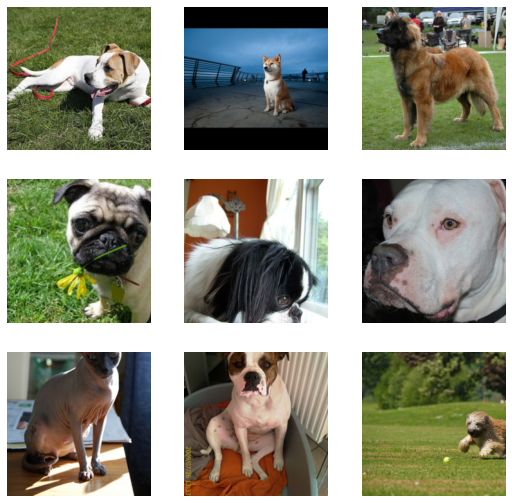

In [32]:
show_images(Contrast(max_lighting=0.9, p=1.0)(images), nrows = 3)

# Data Augmentation

In [33]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = lambda filename: cat_or_dog(filename.name),
                   splitter  = splitter,
                   item_tfms = RandomResizedCrop(128),
                   batch_tfms= aug_transforms())
dblock.summary(image_files)
dataloaders_aug = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_61.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_61.jpg
    applying <lambda> gives
      dog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up aft

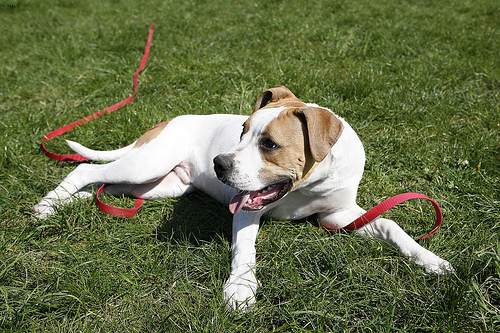

In [34]:
dataloaders_aug.train.dataset[0][0]

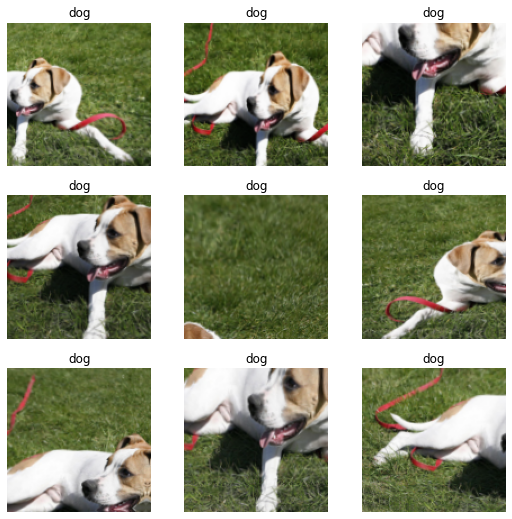

In [35]:
dataloaders_aug.train.show_batch(unique=True)